In [2]:
import numpy as np
import pandas as pd
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy
import seaborn as sns
import re
import random

Датасет взят с репозитория Никиты Вячеславовича 

## Полный анализ датасета включает в себя:
1. построение OLS-Модели,
2. Интерпретация коэффициентов и построение графиков
3. Вычисление TSS, RSS, ESS, стандартной ошибки, R^2 и R^2adj.
4. Значимость переменных и фильтрация по бинарной переменной
5. F-test
6. Доверительные интервалы
7. Прогнозирование
8. Мультиколлинеарность
9. Дамми-переменные
10. Спецификация
11. Гетероскедастичность
12. Серрийная корреляция
13. Тест Чоу, графики структурных сдвигов

## Построение OLS модели 

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/BankPersonalLoanModelling.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
df.rename(columns = {'ZIP Code':'ZIP_Code', 'Personal Loan':'Personal_Loan', 'Securities Account':'Securities_Account', 'CD Account':'CD_Account'}, inplace = True)
df

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


#### Спецификация
$$
Income = \beta_0 + \beta_1*Family+\beta_2*age+\beta_3*CreditCard
$$

In [4]:
bank_eq = smf.ols(formula='np.log(Income)~Family+Age+CreditCard', data=df).fit()
bank_eq.params.round(3)

Intercept     4.444
Family       -0.076
Age          -0.004
CreditCard   -0.005
dtype: float64

# Интерпретация коэффициентов и построение графиков

### Интерпретация
При увелничении значения переменной family на 1, значение переменной Income ументшается на 7,6% при прочих равных условиях.
При увелничении значения переменной age на 1, значение переменной Income ументшается на 0,4% при прочих равных условиях.
Если пользователь имеет кредитную карту, значение переменной Income ументшается на 0,5% при прочих равных условиях.

<AxesSubplot: xlabel='Age', ylabel='Income'>

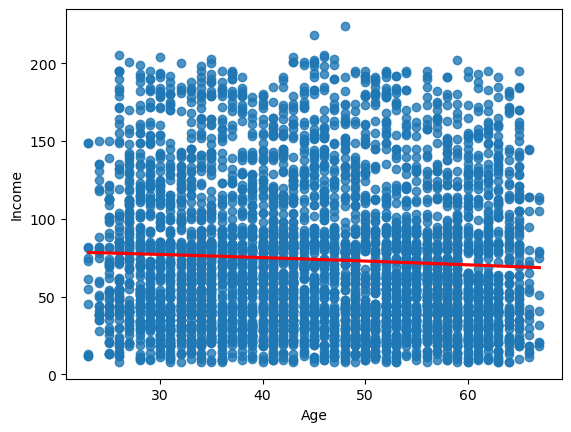

In [5]:
sns.regplot(data=df, y='Income', x='Age', ci=None, order = 2, line_kws={"color": "r"})

In [6]:
df['Age^2']  = df['Age']*df['Age']
df

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age^2
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,625
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,2025
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,1521
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,1225
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,841
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,900
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,3969
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,4225


#### Спецификация
$$
Income = \beta_0 + \beta_1*Family+\beta_2*Age^2+\beta_3*CreditCard
$$

In [7]:
bank_eq1 = smf.ols(formula='np.log(Income)~Family+Age^2+CreditCard', data=df).fit()
bank_eq1.params.round(3)

Intercept     4.433
Family       -0.076
Age ^ 2      -0.004
CreditCard   -0.005
dtype: float64

<AxesSubplot: xlabel='Age^2', ylabel='Income'>

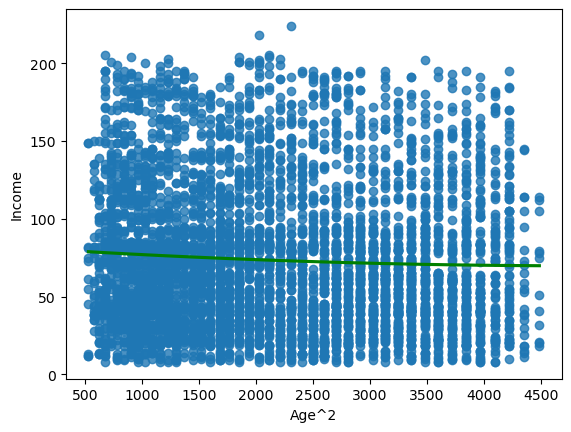

In [8]:
sns.regplot(data=df, y='Income', x='Age^2', ci=None, order = 2, line_kws={"color": "g"})

При использовании переменной второго порядка значения наблюдений смещаются ближе к началу координат, увеличивается точность предсказания и изгиб кривой, т.к. изначально зависимость была линейная, а стала квадратической.

# Вычисление TSS, RSS, ESS, стандартной ошибки, R^2 и R^2adj

In [9]:
# TSS изначальной регрессии
TSS = bank_eq.centered_tss.round(3)
TSS

2424.762

In [10]:
# ESS изначальной регрессии
ESS = bank_eq.ess.round(3)
ESS

46.321

In [11]:
# RSS изначальной регрессии
RSS = bank_eq.ssr.round(3)
RSS

2378.441

In [12]:
#R^2 изначальной регрессии
R2 = RSS/TSS
R2

0.9808966818186691

In [13]:
# Стандартная ошибка изначальной регрессии
s2 = RSS/(5000 - 4)
s2

0.4760690552441953

In [14]:
#R^2adj изначальной регрессии
R2adj = 1 - (1 - R2)*(5000-1)/(5000 - 4)
R2adj

0.980885210650826

In [15]:
model = smf.ols(formula='np.log(Income)~Family+Age+CreditCard', data=df).fit()
model.summary(alpha=0.05).tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037


In [16]:
df = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0] 
df

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037


In [17]:
df['tvalues']  = df['coef']/df['std err']
df

,coef,std err,t,P>|t|,[0.025,0.975],tvalues
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534,96.606522
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060,-8.477778
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002,-3.800000
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037,-0.219048


In [18]:
alpha = 0.05 
print('Уровень значимости alpha: ', alpha)
DF = int(model.df_resid) 
t_crit = scipy.stats.t.ppf(1-alpha/2, DF)
print('Критическое значение t_crit: ', t_crit.round(3))

Уровень значимости alpha:  0.05
Критическое значение t_crit:  1.96


In [19]:
df['znachimosty'] = df.apply(lambda x : 'znachim' if np.abs(x['tvalues']) > t_crit else 'ne znachim', axis = 1 )
df

,coef,std err,t,P>|t|,[0.025,0.975],tvalues,znachimosty
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534,96.606522,znachim
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060,-8.477778,znachim
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002,-3.800000,znachim
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037,-0.219048,ne znachim


### Значимость: 
Значимы переменные Family, Age, а переменная CreditCards не значима 

### Фильтрация по бинарной переменной

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/BankPersonalLoanModelling.csv')
df.rename(columns = {'ZIP Code':'ZIP_Code', 'Personal Loan':'Personal_Loan', 'Securities Account':'Securities_Account', 'CD Account':'CD_Account'}, inplace = True)
df

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [21]:
bank_eq2 = smf.ols(formula='np.log(Income)~Family+Age+CreditCard', data=df[df['CreditCard']==1]).fit()
bank_eq2.params.round(3)

Intercept     2.215
Family       -0.086
Age          -0.003
CreditCard    2.215
dtype: float64

In [22]:
# TSS 
TSS2 = bank_eq2.centered_tss.round(3)
TSS2

724.624

In [23]:
# ESS 
ESS2 = bank_eq2.ess.round(3)
ESS2

15.693

In [24]:
# RSS 
RSS2 = bank_eq2.ssr.round(3)
RSS2

708.931

In [25]:
#R^2 
R2_2 = RSS2/TSS2
R2_2

0.9783432511205812

### вывод 
Предсказанная точность регрессии для заданного значения бинарной переменной CreditCard = '1' yb;t, чем предсказанная точность регрессии для не заданного значения бинарной переменной.

# F-test

$$
H0: \beta_{Age}=\beta_{Experience}=\beta_{Income}=\beta_{Family}=0
$$
$$
H1: \beta_{Age}^2+\beta_{Experience}^2+\beta_{Income}^2+\beta_{Family}^2>0
$$

In [26]:
bank_eq3 = smf.ols(formula='np.log(Income)~Family+Age+CreditCard+Experience+ZIP_Code+CCAvg+Education+Mortgage+Personal_Loan+Securities_Account+CD_Account+Online', data=df[df['CreditCard']==1]).fit()
bank_eq3.params.round(3)

Intercept             2.338
Family               -0.062
Age                  -0.028
CreditCard            2.338
Experience            0.027
ZIP_Code             -0.000
CCAvg                 0.194
Education            -0.074
Mortgage              0.001
Personal_Loan         0.560
Securities_Account    0.021
CD_Account           -0.043
Online                0.055
dtype: float64

In [27]:
# RSS 
RSS3 = bank_eq3.ssr.round(3)
RSS3

417.725

In [28]:
# TSS 
TSS3 = bank_eq3.centered_tss.round(3)
TSS3

724.624

In [29]:
#R^2 
R2_3 = RSS3/TSS3
R2_3

0.5764713837797257

In [30]:
unrest, rest = np.float_(re.findall(r'([-+]?\d+.\d+)','R2                      0.576          0.98'))
print (unrest, rest)

0.576 0.98


In [31]:
F_obs = (unrest - rest)/(1-unrest)*(5000 - 13)/4
F_obs

-1187.941037735849

In [32]:
alpha = 0.05
F_cr = stats.f.ppf(1-alpha, 4, 5000-13)
F_cr

2.373713672224553

### Вывод: 
$$
F_{obs}<F{cr}
$$
Данные согласуются с гипотезорй Н0

# Доверительные интервалы

In [33]:
model = smf.ols(formula='np.log(Income)~Family+Age+CreditCard', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Income)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     32.43
Date:                Thu, 11 May 2023   Prob (F-statistic):           9.36e-21
Time:                        17:40:12   Log-Likelihood:                -5237.2
No. Observations:                5000   AIC:                         1.048e+04
Df Residuals:                    4996   BIC:                         1.051e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4439      0.046     96.735      0.000       4.354       4.534
Family        -0.0763      0.009     -8.968      0.000      -0.093      -0.060
Age           -0.0038      0.001     -4.506      0.000      -0.006      -0.002
CreditCard    -0.0046      0.021     -0.216      0.829      -0.047       0.037
==============================================================================
Omnibus:                      197.867   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.504
Skew:                          -0.504   Prob(JB):                     3.57e-48
Kurtosis:                       2.819   Cond. No.                         222.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
df_table = pd.read_html(model.summary().tables[1].as_html(), header=0, index_col=0)[0]
df_table

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037


In [35]:
alpha = 0.05 # Уровень значимости 5%

In [36]:
nobs = model.nobs
regr_cnt = model.df_model + 1
print(f'Количество наблюдений = {nobs:.0f}')
print(f'Количество регрессоров + 1 = {regr_cnt:.0f}')
# 5%-критическое значение t-распределения
t_cr = stats.t.ppf(1-alpha/2, nobs - regr_cnt)
print(f'Уровень значимости alpha = {alpha:.2f}')
print(f'Критическое значение t_cr = {t_cr:.3f}')

Количество наблюдений = 5000
Количество регрессоров + 1 = 4
Уровень значимости alpha = 0.05
Критическое значение t_cr = 1.960


In [37]:
df_table['lower'] = (df_table['coef'].astype(float) - df_table['std err'].astype(float)*t_cr).round(2)
df_table['upper'] = (df_table['coef'].astype(float) + df_table['std err'].astype(float)*t_cr).round(2)
df_table

,coef,std err,t,P>|t|,[0.025,0.975],lower,upper
Intercept,4.4439,0.046,96.735,0.000,4.354,4.534,4.35,4.53
Family,-0.0763,0.009,-8.968,0.000,-0.093,-0.060,-0.09,-0.06
Age,-0.0038,0.001,-4.506,0.000,-0.006,-0.002,-0.01,-0.00
CreditCard,-0.0046,0.021,-0.216,0.829,-0.047,0.037,-0.05,0.04


# Прогнозирование

In [38]:
## выбираем 4 случайных строки
df_ppl = df.sample(n=4)
df_ppl

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
3333,3334,37,13,79,91711,4,0.1,2,280,0,0,0,1,0
4438,4439,43,18,22,90025,2,0.0,3,0,0,0,0,0,0
4096,4097,38,14,49,90740,3,2.8,1,0,0,0,0,0,0
4985,4986,48,23,30,94720,3,1.7,2,162,0,0,0,1,0


In [39]:
res = model.predict(exog=df_ppl, transform=True)

In [40]:
df_res = pd.DataFrame(res.round(2), columns=['Прогноз'])
df_res.reset_index(drop=True , inplace=True)
df_res.index += 1
df_res

,Прогноз
1,4.00
2,4.13
3,4.07
4,4.03


# Мультиколлинеарность

Для вычисления показателей VIF для коэффициентов Age, Family, Education будем рассматривать следующие регрессии:

Age на Family, ZIP_Code, Education, Mortgage 
Family на Age, ZIP_Code, Education, Mortgage
Education на Family, ZIP_Code, Mortgage, Age

In [41]:
model__0 = smf.ols(data = df , formula = 'Income~Age+Family+Education+Mortgage+ZIP_Code').fit()
model__1 = smf.ols(data = df , formula = 'Age~Family+Education+Mortgage+ZIP_Code').fit()
model__2 = smf.ols(data = df , formula = 'Family~Age+Education+Mortgage+ZIP_Code').fit()
model__3 = smf.ols(data = df , formula = 'Education~Age+Family+Mortgage+ZIP_Code').fit()
model__1.params.round(3)

Intercept    59.456
Family       -0.491
Education     0.596
Mortgage     -0.001
ZIP_Code     -0.000
dtype: float64

In [42]:
model__1.rsquared

0.005047343324714126

In [43]:
VIF_1 = 1/(1 - model__1.rsquared.round(3))
VIF_1.round(2)

1.01

In [44]:
VIF_2 = 1/(1 - model__2.rsquared.round(3))
VIF_2.round(2)

1.01

In [45]:
VIF_3 = 1/(1 - model__3.rsquared.round(3))
VIF_3.round(2)

1.01

# Дамми-переменные

### Выше я построила модель, отфильтрованную по бинарной переменной CreditCard, а также вычислила R2. Возьмем данные оттуда

$$
Н0: \beta_{Income}=\beta_{Family}=\beta_{Age}=\beta{CreditCard}=0
H1: \beta_{Income}^2+\beta_{Family}^2+\beta_{Age}^2+\beta{CreditCard}^2>0

In [46]:
data_string = '''R2                      0.978          0.576  '''
rest, unrest =np.float_(re.findall(r'([-+]?\d+.\d+)', data_string)) 

In [47]:
F_obs = (unrest - rest)/(1-unrest)*(935-10)/5
F_obs.round(2)

-175.4

In [48]:
alpha = 0.05 
F_cr = stats.f.ppf(1-alpha,4,706-8)
F_cr

2.384692685857469

$$
F_{obs}<F_{cr}
$$
Нет оснований отвергать гипотезу Н0, структурные сдвиги не значимы

# Спецификация


$$
H0:\beta_{income^2}=\beta_{income^3}=\beta_{income^4}=0
$$

In [49]:
model = smf.ols(formula='np.log(Income)~Family+Age+CreditCard', data=df).fit()
model.params

Intercept     4.443865
Family       -0.076340
Age          -0.003840
CreditCard   -0.004629
dtype: float64

In [ ]:
df['inc2'] =model.predict()**2
df['inc3'] =model.predict()**3
df['inc4'] =model.predict()**4

In [51]:
model___1 = smf.ols(formula='np.log(Income)~Family+Age+CreditCard+inc2+inc3+inc4', data=df).fit()
model.params

Intercept     4.443865
Family       -0.076340
Age          -0.003840
CreditCard   -0.004629
dtype: float64

In [54]:
R2=model___1.rsquared
R2_res = model.rsquared

In [55]:
((R2 - R2_res)/(1-R2))*((len(df)-7)/3)

10.946316509465605

In [56]:
alpha = 0.05
stats.f.ppf(1-alpha,3,len(df)-7).round(2)

2.61

$$
F_{cr}<F_{obs}
$$
Данные согласуются с гипотезой Н0

# Гетероскедастичность

In [57]:
# квадраты остатков добавим в датафрейм
df['res2']=model.resid**2
df['res']=model.resid

In [58]:
 sub_model= smf.ols(data=df, formula='res2~Family+Age+CreditCard').fit()

$$
H0:\gamma_{1}=\gamma_{2}=\gamma_{3}=0
$$
$$
H1:\gamma_{1}^2+\gamma_{2}^2+\gamma_{3}^2>0
$$

In [59]:
St = np.round(len(df)*sub_model.rsquared,2)
St

27.51

In [60]:
Hi2 = stats.chi2.ppf(1-0.05,6)
Hi2

12.591587243743977

$$
nR_{0}^2 > X_{p}^2
$$
Отвергаем Н0. Тест указывает на гетероскедастичность 

# Серийная корреляция

In [61]:
resSq = sum(model.resid**2)

In [62]:
sum_resid = 0
for i in range(len(model.resid)-1):
    sum_resid+=(model.resid[i+1]-model.resid[i])**2

$$
DW-test:
$$
$$
H0:p = 0
$$
$$
H1:p ≠ 0
$$

In [63]:
sum_resid/resSq

1.9901373421893824

$$
p ≠ 0
$$
Гипотеза Н0 отвергается, есть серийная когрреляция

# Тест Чоу, графики структурных сдвигов

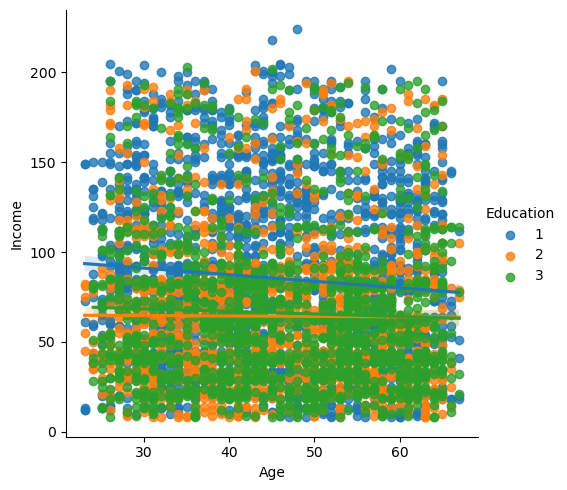

In [7]:
sns.lmplot(x='Age', y='Income', hue='Education', data=df)

## Анализ графика: 
-С ростом уровня образования увеличивается доход
-Чем старше человек, тем больше его доход
-У людей, имеющих высшее образование, доход в среднем выше, чем у людей, его не имеющих вне зависимости от возраста.

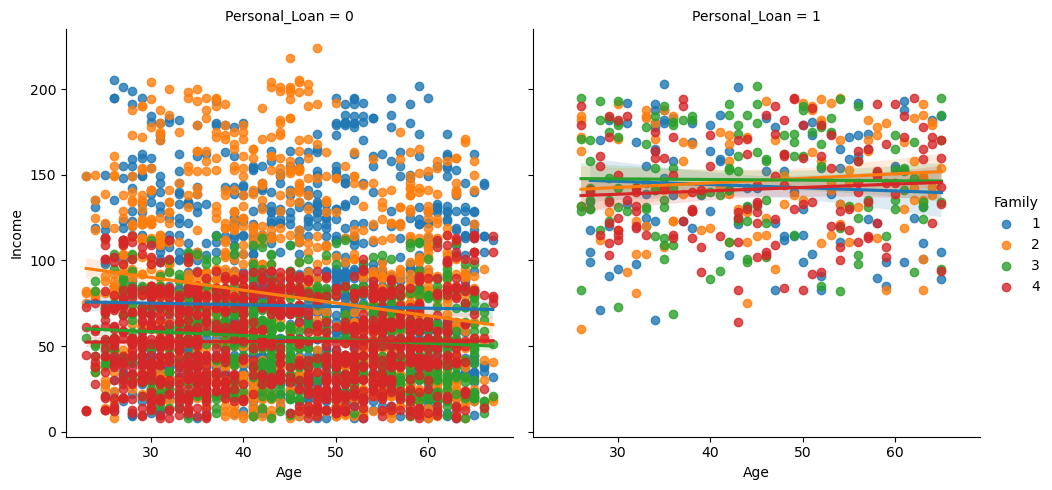

In [10]:
sns.lmplot(x="Age", y="Income",hue='Family',col='Personal_Loan', data=df)

## Анализ графиков:

У людей, не имеющих вклады в банке (Personal Loan = 0)
Семьи таких людей в среднем болшьшие, большое количество людей, имебющих более трех детей.
Доход таких семей в среднем меньше, чем доход людкей, имеющих банковские вклады вне зависимости от количества детей.
Чем больше детей, тем меньше доход (Это утверждение не действительно в отношении людей, имеющих 1-2 детей)
У людей, имеющих вклады в банке (Personal Loan = 1)
Семьи таких людей в среднем не болшьшие, распределение детией примерно равномерно.
Доход таких семей в среднем мвыше, чем доход людей, не имеющих банковские вклады вне зависимости от количества детей.
Доход не зхависит от количества детей и возраста.